# Read a NetCDF

Here there are some piece of code to open and read a NetCDF file.

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
## to convert unix time to human readable date
import time
import datetime

from netCDF4 import Dataset

In [9]:
os.chdir("C:\\Users\\Niccolo\\OMS\\OMS_Project_Richards1D_Newest\\data\\Grid_NetCDF")
os.listdir()


['ClaySand_noPonding.nc',
 'Clay_noPonding.nc',
 'SandClay_01Ponding_Measurement.nc',
 'Sand_01Ponding.nc']

Create an object of type NetCDF using the function _Dataset_

In [10]:
ncfile = Dataset('SandClay_01Ponding_Measurement.nc','r') 

It is possible to read file info simply running _print(ncfile)_


In [11]:
print('\n ***FILE INFO:\n')
print(ncfile)


 ***FILE INFO:

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: Grid 2 layers clay and sand with 0.1m ponding water, linear interpolation of psi in soil, 
            Clay: thetaS =  0.5, thetaR = 0.07, Ks = 0.000023m/s, alphaSpecificStorage = 0, betaSpecificStorage = 0
                  VG model: n = 1.7, alpha = 5.88 m-1 
            Sand: thetaS =  0.38, thetaR = 0.02, Ks = 0.003697m/s, alphaSpecificStorage = 0, betaSpecificStorage = 0
                  VG model: n = 1.16, alpha = 1.47 m-1 
            inputfile: data\RichardMeshGen_input\SandClay_01Ponding_Measurement.csv
    institution: Geoframe
    summary: This file stores all grid information (geometry, soiAll data computed above are saved in NetCDF file
    date_created: 5/22/2018
    dimensions(sizes): z(640), zz(639)
    variables(dimensions): float64 eta(z), float64 etaDual(z), float64 z(z), float64 zDual(z), float64 psiIC(z), float64 spaceDelta(z), float64 et(z), float64 d

It is possible to read some information added by whom created this file such as title, institution, summary (should contain essential description of data), and all variables stored and their type.

More informations on variables can be obtained running _ncfile.variable_. Doing so, we get:
- variable type, such as float64;
- variable unit;
- long_name of the variable describing the variable itself;
- its dimension. Usually we have unlimited dimensions since the number of time step is not assigned

In [6]:
ncfile.variables

OrderedDict([('eta', <class 'netCDF4._netCDF4.Variable'>
              float64 eta(z)
                  unit: m
                  long_name: η coordinate of volume centroids: zero is at soil surface and and positive upward
              unlimited dimensions: 
              current shape = (321,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('etaDual', <class 'netCDF4._netCDF4.Variable'>
              float64 etaDual(z)
                  unit: m
                  long_name: η coordinate of volume interfaces: zero is at soil surface and and positive upward. 
              unlimited dimensions: 
              current shape = (321,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('z', <class 'netCDF4._netCDF4.Variable'>
              float64 z(z)
                  unit: m
                  long_name: z coordinate  of volume centroids: zero is at the bottom of the column and and positive upward
         

To store a varible contained in a NetCDF file in a python variable we can run the following line

In [6]:
ic = ncfile.variables['psiIC']

where the argument of the method varibles is the key used in the NetCDF. This can be read from the FILE INFO printed above.

Again, it is possible to read ic information just running the code below

In [7]:
print('\n ***ic INFO:\n')
print(ic)


 ***ic INFO:

<class 'netCDF4._netCDF4.Variable'>
float64 psiIC(depth)
    units: m
    long_name: Initial condition for hydraulic head
unlimited dimensions: 
current shape = (321,)
filling off



The variable ic is of type float64, its unit is meters, it contains the intial condition for water suction, and has 321 entries.

To get its first value run

In [8]:
ic[0]

-0.0031250000000000444

In [9]:
depth = ncfile.variables['depth']
print('\n ***depht INFO:\n')
print(depth)


 ***depht INFO:

<class 'netCDF4._netCDF4.Variable'>
float64 depth(depth)
    units: m
    long_name: Soil depth
unlimited dimensions: 
current shape = (321,)
filling off



It is possible to plot the initial condition versus depth

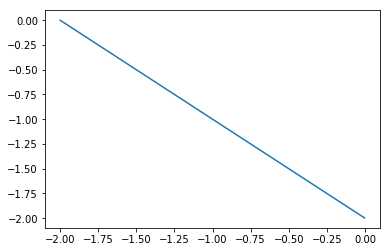

In [10]:
plt.plot(ic[:],depth[:])
plt.show()

It is possible to add axis labels using info contained in the NetCDF file (if it is written in the proper manner)

plt.plot(ic[:],depth[:])
plt.xlabel(ncfile.variables['psiIC'].long_name + '  [' +ncfile.variables['psiIC'].units +']')
plt.ylabel(ncfile.variables['depth'].long_name + '  [' +ncfile.variables['depth'].units +']')
plt.show()

Now let us consider the varible $\psi$

In [11]:
psi = ncfile.variables['psi']
print('\n ***depht INFO:\n')
print(psi)


 ***depht INFO:

<class 'netCDF4._netCDF4.Variable'>
float64 psi(time, depth)
    units: m
    long_name: Hydraulic head
unlimited dimensions: time
current shape = (577, 321)
filling off



$\psi$ has both a space dimension and a time dimension: the first index identifies the time level the second one the space. 

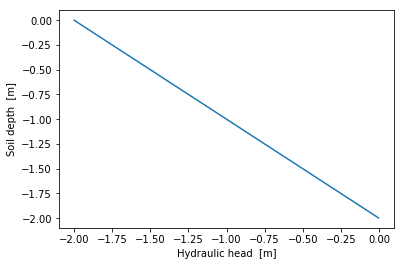

In [12]:
plt.plot(psi[0,:],depth[:])
plt.xlabel(ncfile.variables['psi'].long_name + '  [' +ncfile.variables['psi'].units +']')
plt.ylabel(ncfile.variables['depth'].long_name + '  [' +ncfile.variables['depth'].units +']')
plt.show()

The plot above represent the solution for $\psi$ at the first time step (in python index starts from 0 and not from 1).



But I might be interested to see how $\psi$ varies over time at the same depth. In this case the piece of code above modifies as follows

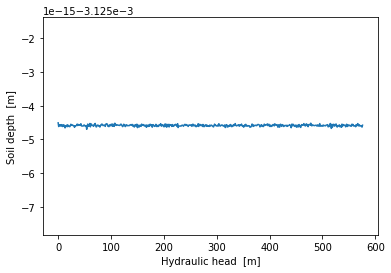

In [13]:
plt.plot(psi[:,0])
plt.xlabel(ncfile.variables['psi'].long_name + '  [' +ncfile.variables['psi'].units +']')
plt.ylabel(ncfile.variables['depth'].long_name + '  [' +ncfile.variables['depth'].units +']')
plt.show()

To have a better plot I can create a vector of human readable dates

In [14]:
time = ncfile.variables['time']
print('\n ***TIME INFO:\n')
print(time)

dates = [datetime.datetime.fromtimestamp(t).strftime("%Y-%m-%d %H:%M") for t in time[:]]



 ***TIME INFO:

<class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    units: unix convention
unlimited dimensions: time
current shape = (577,)
filling off



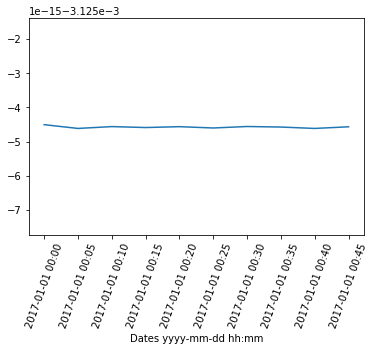

In [20]:
plt.plot(dates[0:10],psi[0:10,0])
plt.xlabel('Dates yyyy-mm-dd hh:mm')
plt.xticks(rotation=70)
plt.show()

The key _topBC_ contains the hyetograph used as top boundary condition

In [17]:
topBC = ncfile.variables['topBC']
print('\n ***TIME INFO:\n')
print(topBC)


 ***TIME INFO:

<class 'netCDF4._netCDF4.Variable'>
float64 topBC(time)
    units: mm
    long_name: rainfall heights
unlimited dimensions: time
current shape = (577,)
filling off



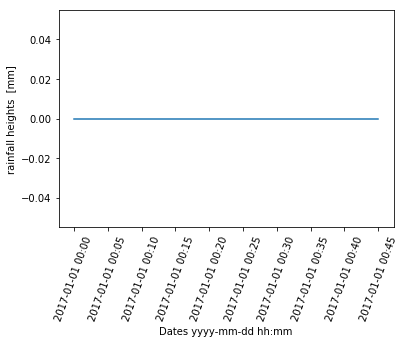

In [22]:
plt.plot(dates[0:10],topBC[0:10])
plt.xlabel('Dates yyyy-mm-dd hh:mm')
plt.ylabel(ncfile.variables['topBC'].long_name + '  [' +ncfile.variables['topBC'].units +']')
plt.xticks(rotation=70)
plt.show()

To know the cumulative rainfall height we can just run

In [23]:
np.sum(topBC[0:10])

0.0

In [7]:
ncfile.close()